In [2]:
import pandas as pd
print(pd.__version__)

2.0.3


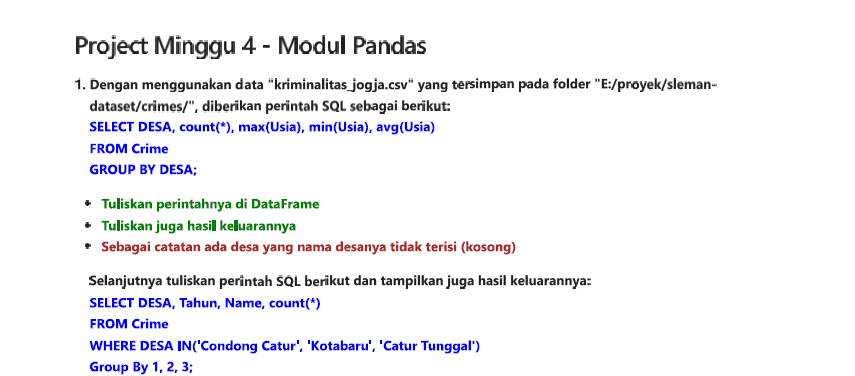

In [13]:
from IPython.display import Image
Image("M4 Propas/No 1.png")


In [10]:
# Nomor 1_Minggu 4
# Husnun Eka Meilani
# 22/506141/TK/55436

import pandas as pd

# Membuka csv dari sleman database
crime = pd.read_csv('datasets/crimes/kriminalitas_jogja.csv')

# First query: SELECT DESA, count(*), max(Usia), min(Usia), avg(Usia) FROM Crime GROUP BY DESA
group = crime.groupby('DESA')
count = group.size()  # Count of records per DESA
max_usia = group['Usia'].max()  # Maximum Usia
min_usia = group['Usia'].min()  # Minimum Usia
avg_usia = group['Usia'].mean()  # Average Usia

# Combine the results into a single DataFrame
sql1 = pd.DataFrame({
    'count': count,
    'max_usia': max_usia,
    'min_usia': min_usia,
    'avg_usia': avg_usia
}).reset_index()
#hasil dari SQL 1
print(sql1)

# 2nd SQL: SELECT DESA, Tahun, Name, count(*) FROM Crime 
#WHERE DESA IN('Condong Catur','Kotabaru', 'Catur Tunggal') GROUP BY DESA, Tahun, Name
filtering = ['Condong Catur', 'Kotabaru', 'Catur Tunggal']
sql2 = crime[crime['DESA'].isin(filtering)].groupby(['DESA', 'Tahun', 'Name']).size().reset_index(name='count')

# Display the result of the second query
print(sql2)

              DESA  count  max_usia  min_usia   avg_usia
0                       2        39        25  32.000000
1    Ambarketawang      1        48        48  48.000000
2        Argomulyo      1        27        27  27.000000
3         Argosari      1        37        37  37.000000
4           Baciro      4        65        29  51.500000
..             ...    ...       ...       ...        ...
118     Warungboto      2        24        19  21.500000
119    Wedomartani      3        57        29  45.666667
120      Wirogunan      2        47        32  39.500000
121     Wirokerten      2        58        43  50.500000
122       Wonosari      1        27        27  27.000000

[123 rows x 5 columns]
             DESA  Tahun                          Name  count
0   Catur Tunggal   2014                      Penipuan      2
1   Catur Tunggal   2014      Penipuan dan penggelapan      1
2   Catur Tunggal   2015                         Curas      1
3   Catur Tunggal   2015                    

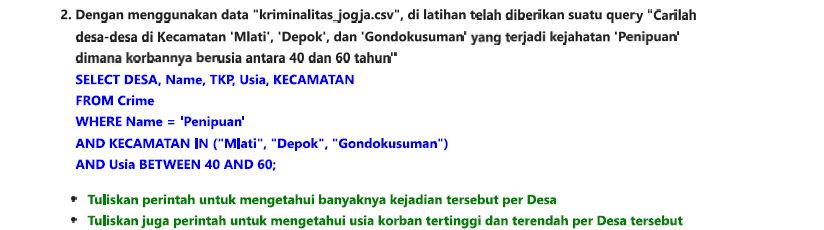

In [14]:
from IPython.display import Image
Image("M4 Propas/No 2.png")

In [7]:
# Nomor 2_Minggu 4
# Husnun Eka Meilani
# 22/506141/TK/55436

import pandas as pd

# Muat dataset
file_path = 'datasets/crimes/kriminalitas_jogja.csv'
df = pd.read_csv(file_path)

# Filter data sesuai dengan kondisi
filtered_df  = df[(df['Name'] == 'Penipuan') & 
                 ((df['KECAMATAN'] == 'Mlati') | (df['KECAMATAN'] == 'Depok')| (df['KECAMATAN'] == 'Gondokusuman')) & 
                 (df['Usia'] >= 40) & (df['Usia'] <= 60)]

# Query 1: Hitung banyaknya kejadian per Desa 
kejadian_per_desa = filtered_df.groupby('DESA').size().reset_index(name='count')

# Menampilkan hasil banyaknya kejadian 'Penipuan' per Desa
print("Banyaknya kejadian 'Penipuan' dengan usia korban antara 40 dan 60 tahun per Desa:")
print("{:^36}".format("DESA"))
print("{:<16}".format("DESA"))  # Menampilkan header secara rapi

# Menggunakan vektorisasi untuk menampilkan tabel hasil
print("\n".join([f"{desa:<13} {count:>6}" for desa, count in zip(kejadian_per_desa['DESA'], kejadian_per_desa['count'])]))

# Query 2: Hitung banyaknya kejadian, usia tertinggi dan usia terendah per Desa 
usia_per_desa = filtered_df.groupby('DESA').agg( 
    count=('DESA', 'size'),
    max_Usia=('Usia', 'max'),
    min_Usia=('Usia', 'min')
).reset_index()

# Menampilkan hasil banyaknya kejadian, usia tertinggi, dan usia terendah per Desa
print("\nBanyaknya kejadian 'Penipuan', korban usia tertinggi, dan korban usia terendah per Desa:")
print("{:>21}".format("Usia"))
print("{:>21} {:>4} {:>4}".format("count", "max", "min"))  # Menampilkan header secara rapi
print("DESA")

# Menggunakan vektorisasi untuk menampilkan tabel hasil
print("\n".join([f"{desa:<13} {count:>6} {max_Usia:>4} {min_Usia:>4}" for desa, count, max_Usia, 
                 min_Usia in zip(usia_per_desa['DESA'], usia_per_desa['count'], 
                                 usia_per_desa['max_Usia'], usia_per_desa['min_Usia'])]))

Banyaknya kejadian 'Penipuan' dengan usia korban antara 40 dan 60 tahun per Desa:
                DESA                
DESA            
Catur Tunggal      7
Condong Catur      3
Klitren            1
Kotabaru           2
Maguwoharjo        3
Sinduadi           3
Terban             1

Banyaknya kejadian 'Penipuan', korban usia tertinggi, dan korban usia terendah per Desa:
                 Usia
                count  max  min
DESA
Catur Tunggal      7   60   41
Condong Catur      3   52   44
Klitren            1   49   49
Kotabaru           2   58   40
Maguwoharjo        3   49   41
Sinduadi           3   55   42
Terban             1   51   51


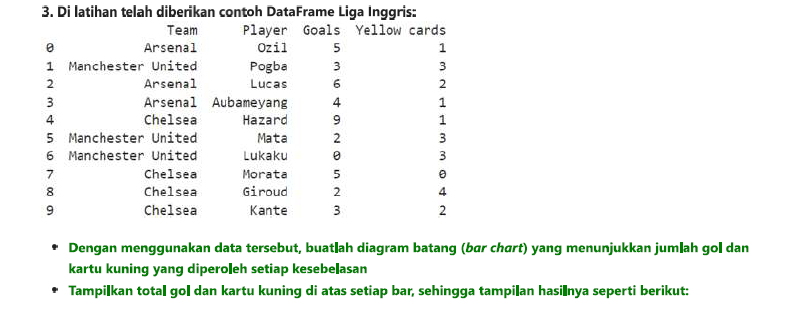

In [17]:
from IPython.display import Image
Image("M4 Propas/No 3.png")


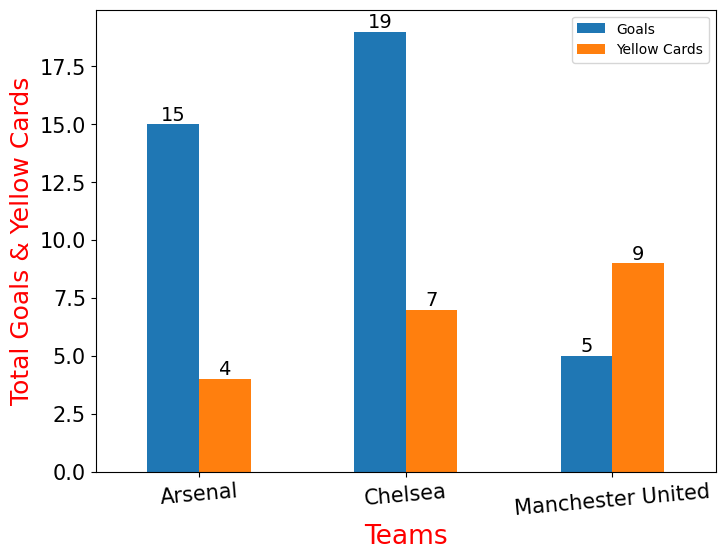

In [4]:
# Nomor 3_Minggu 4
import pandas as pd
import matplotlib.pyplot as plt
# Husnun Eka Meilani
# 22/506141/TK/55436

# Mengubah data tabel di script
data = {
    "Team": ["Arsenal", "Manchester United", "Arsenal", "Arsenal", "Chelsea", "Manchester United", 
             "Manchester United", "Chelsea", "Chelsea", "Chelsea"],
    "Player": ["Ozil", "Pogba", "Lucas", "Aubameyang", "Hazard", "Mata", "Lukaku", "Morata", "Giroud", "Kante"],
    "Goals": [5, 3, 6, 4, 9, 2, 0, 5, 2, 3],
    "Yellow Cards": [1, 3, 2, 1, 1, 3, 3, 0, 4, 2]
}

# Create DataFrame
df = pd.DataFrame(data)

# Group the data by 'Team' and sum the 'Goals' and 'Yellow Cards' for each team
df_team = df.groupby('Team')[['Goals', 'Yellow Cards']].sum()

# Plotting Goals and Yellow Cards side by side per team
ax = df_team.plot(kind='bar', width=0.5, figsize=(8, 6))

# Customize x-axis label: making "Teams" red and bigger
plt.xlabel('Teams', fontsize=19, color='red')
plt.ylabel('Total Goals & Yellow Cards', fontsize=18, color='red')

# Rotating team names by 5 degrees
plt.yticks(fontsize=15)
plt.xticks(rotation=5, fontsize=15)

# Adding the total values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=14)

# Show plot
plt.show()


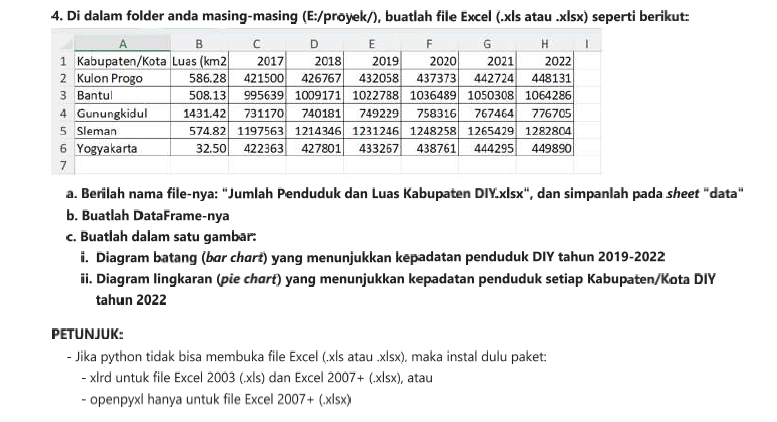

In [18]:
from IPython.display import Image
Image("M4 Propas/No 3.png")

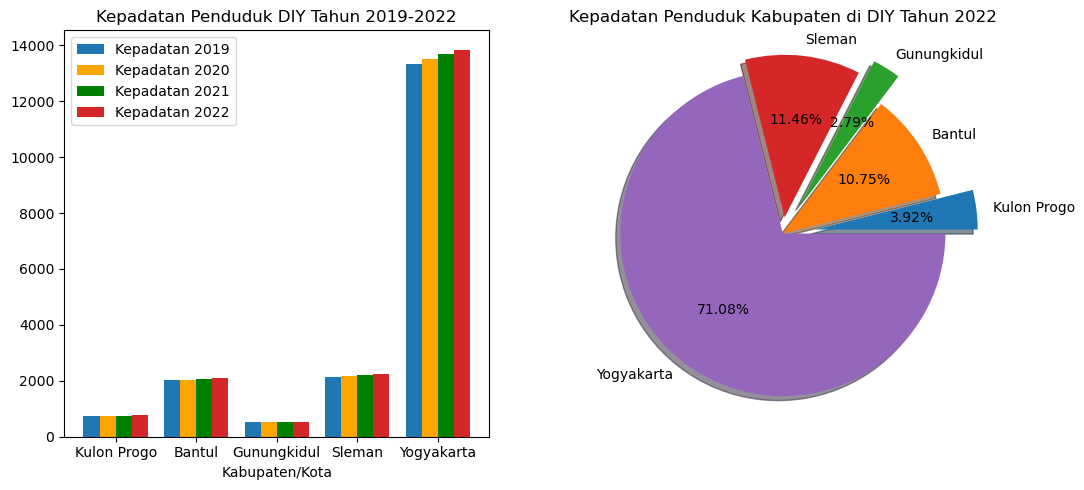

In [8]:
# Nomor 4_Minggu 4
# Husnun Eka Meilani
# 22/506141/TK/55436

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca file excel
file_path = 'M4 Propas/Jumlah_Penduduk_dan_Luas_Kabupaten_DIY.xlsx'
df = pd.read_excel(file_path, sheet_name='data')

# Menghitung kepadatan penduduk (jumlah penduduk/luas wilayah)
df['Kepadatan 2019'] = df['2019'] / df['Luas (km2)']
df['Kepadatan 2020'] = df['2020'] / df['Luas (km2)']
df['Kepadatan 2021'] = df['2021'] / df['Luas (km2)']
df['Kepadatan 2022'] = df['2022'] / df['Luas (km2)']

# Membuat subplot dengan 1 baris dan 2 kolom
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# Menambahkan jarak diantara kedua subplot
fig.subplots_adjust(wspace=4)

# Diagram batang untuk kepadatan penduduk DIY tahun 2019-2022 pada subplot pertama
warna = ['#1f77b4', 'orange', 'green', '#d62728']
years = ['Kepadatan 2019', 'Kepadatan 2020', 'Kepadatan 2021', 'Kepadatan 2022']
barWidth = 0.20

positions = list(range(len(df)))
for i, year in enumerate(years):
    bars = axs[0].bar([p+barWidth*i for p in positions], 
                      df[year], width=barWidth, color=warna[i], label=year)

# Set pengaturan untuk sumbu x
axs[0].set_xticks([p + 1.5 * barWidth for p in positions])
axs[0].set_xticklabels(df['Kabupaten/Kota'])
axs[0].set_xlabel('Kabupaten/Kota')
axs[0].set_title('Kepadatan Penduduk DIY Tahun 2019-2022')

# Menambahkan legend untuk diagram batang
axs[0].legend()

# Pie chart untuk kepadatan penduduk tahun 2022 pada subplot kedua
myexplode = [0.2, 0, 0.2, 0.1, 0]
axs[1].pie(df['Kepadatan 2022'], labels=df['Kabupaten/Kota'], autopct='%.2f%%', 
           labeldistance=1.1, explode=myexplode, shadow=True)
axs[1].set_title('Kepadatan Penduduk Kabupaten di DIY Tahun 2022')

# Menampilkan kedua diagram
plt.tight_layout()
plt.show()

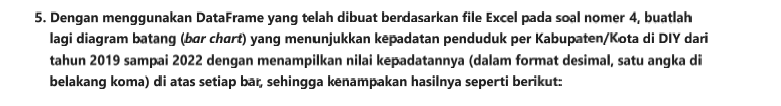

In [19]:
from IPython.display import Image
Image("M4 Propas/No 5.png")

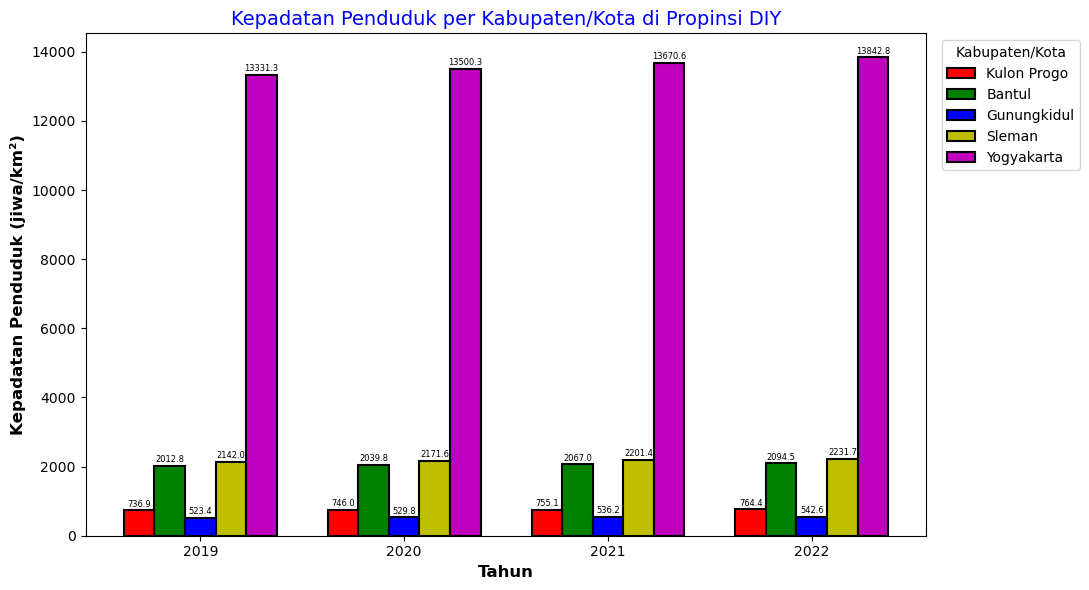

In [5]:
# Nomor 5_Minggu 4
# Husnun Eka Meilani
# 22/506141/TK/55436
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baca data dari file Excel (sesuaikan file path jika berbeda)
jumlah = 'M4 Propas/Jumlah_Penduduk_dan_Luas_Kabupaten_DIY.xlsx'
df = pd.read_excel(jumlah)

# Menghitung kepadatan penduduk per kabupaten per tahun
kabupaten = df['Kabupaten/Kota'].values
luas_wilayah = df['Luas (km2)'].values
tahun = ['2019', '2020', '2021', '2022']
kepadatan = {}
for idx, kab in enumerate(kabupaten):
    kepadatan[kab] = []
    for thn in tahun:
        Jumlah_penduduk = df.loc[idx, thn]
        density = Jumlah_penduduk / luas_wilayah[idx]
        kepadatan[kab].append(density)

# Konfigurasi plot
fig, ax = plt.subplots(figsize=(11, 6))

bar_width = 0.15  # Lebar bar diperbaiki agar sesuai
index = np.arange(len(tahun))

warna = {
    'Kulon Progo': 'r',
    'Bantul': 'g',
    'Gunungkidul': 'b',
    'Sleman': 'y',
    'Yogyakarta': 'm'
}

# Plot setiap kabupaten dengan pergeseran bar
for i, kab in enumerate(kabupaten):
    bars = ax.bar(index + i * bar_width, kepadatan[kab], bar_width,
                   color=warna[kab], edgecolor='black', linewidth=1.5, label=kab)

    # Menambahkan Label di atas setiap bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 50,  # Sesuaikan posisi label
                f'{height:.1f}', ha='center', va='bottom', fontsize=6)

# Menambahkan label sumbu X dan Y serta judul
ax.set_xlabel('Tahun', fontweight='bold', color='black', fontsize=12) 
ax.set_ylabel('Kepadatan Penduduk (jiwa/km²)', fontweight='bold', color='black', fontsize=12)
ax.set_title('Kepadatan Penduduk per Kabupaten/Kota di Propinsi DIY', color='blue', fontsize=14)

# Menyesuaikan label sumbu X
ax.set_xticks(index + bar_width * 2)
ax.set_xticklabels(tahun)

# Menambahkan legenda di luar plot
plt.legend(bbox_to_anchor=(1.01, 1), title='Kabupaten/Kota', loc='upper left')

# Tampilkan plot dengan layout yang rapi
plt.tight_layout()
plt.show()